In [6]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    auc,
)
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [11]:
full_train = pd.read_csv("../datasets/train_clean.csv")

to_drop = [
    "Name",
    "Ticket",
    "Embarked",
    "PassengerId",
    *[c for c in full_train if "cabin" in c.lower()],
]

full_train.drop(columns=to_drop, inplace=True)

target_col = "Survived"

X = full_train.drop(target_col, axis=1)
y = full_train[target_col]

X_train, y_train = X, y

model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    criterion="entropy",
    oob_score=True,
)

param_grid = {
    "n_estimators": [20, 50, 100, 200],
    "max_depth": [2, 5, 10, 20],
    "max_features": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20],
    "criterion": ["gini", "entropy"],
}

# 0      {'criterion': 'entropy', 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# 1     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# 2     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# 3         {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# 4      {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 50}
# 5      {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
# 6     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
# 7     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# 8     {'criterion': 'entropy', 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# 9     {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# 10     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# 11     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# 12    {'criterion': 'entropy', 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
# 13    {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
# 14     {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
# 15     {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 20}
# 16    {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# 17     {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# 18     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 20}
# 19       {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
# 20     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
# 21     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
# 22     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# 23      {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}
# 24     {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

param_grid = {
    "n_estimators": [50, 200],
    "max_depth": [9, 14, 17, 20],
    "max_features": [10, 13, 17, 20, "sqrt"],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [5, 10, 20],
}

grid_search = GridSearchCV(
    model, param_grid, n_jobs=1, cv=5, scoring="accuracy", verbose=10
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


[CV 1/5; 1/240] END max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.815 total time=   2.0s
[CV 2/5; 1/240] START max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 1/240] END max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.803 total time=   0.1s
[CV 3/5; 1/240] START max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 1/240] END max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.882 total time=   0.1s
[CV 4/5; 1/240] START max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 1/240] END max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.809 total time=   0.1s
[CV 5/5; 1/240] START max_depth=9, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

top_models_indices = grid_search.cv_results_["mean_test_score"].argsort()[-10:][::-1]

top_models_params = [
    grid_search.cv_results_["params"][index] for index in top_models_indices
]

top_models = []

for params in top_models_params:
    model = clone(grid_search.best_estimator_)
    model.set_params(**params)
    model.fit(X_train, y_train)
    top_models.append((f"model_{repr(params)}", model))

ensemble_model = VotingClassifier(estimators=top_models, voting="hard")

y_train_pred = cross_val_predict(ensemble_model, X_train, y_train, cv=5)

ensemble_model.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"Ensemble Model Accuracy on Training Set: {accuracy_train}")

Ensemble Model Accuracy on Training Set: 0.843644544431946


In [13]:
y_train_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)

accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"Best Model Accuracy on Training Set: {accuracy_train}")

Best Model Accuracy on Training Set: 0.84251968503937


In [14]:
res_dicts = pd.DataFrame(
    pd.DataFrame(grid_search.cv_results_)
    .sort_values(by="rank_test_score")["params"]
    .values
)[0]

In [15]:
with pd.option_context("display.max_colwidth", 200):
    print(res_dicts.iloc[:25])

0      {'max_depth': 20, 'max_features': 17, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
1      {'max_depth': 17, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
2      {'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
3      {'max_depth': 14, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
4      {'max_depth': 14, 'max_features': 17, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
5      {'max_depth': 17, 'max_features': 17, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
6     {'max_depth': 20, 'max_features': 13, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
7       {'max_depth': 9, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
8     {'max_depth': 14, 'max_features': 13, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_e

In [16]:
import joblib

joblib.dump(
    grid_search,
    f"../models/{grid_search.best_estimator_.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.joblib",
)
joblib.dump(
    ensemble_model, f"../models/ensemble_{grid_search.best_score_ * 100:.4f}.joblib"
)

['../models/ensemble_84.2538.joblib']

In [17]:
model_name = grid_search.estimator.__class__.__name__

get_best = True  # get the best model or the latest model

# get files in models sorted by last modified
if get_best:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: re.search(r"_(\d+\.\d+)\.joblib", x).group(1), reverse=True
    )
    file_name = files[0]
else:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: os.path.getmtime(os.path.join("models", x)), reverse=True
    )
    file_name = files[0]
loaded_grid_search = joblib.load(f"../models/{file_name}")

In [26]:
model_name = "ensemble"

get_best = True  # get the best model or the latest model

# get files in models sorted by last modified
if get_best:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: re.search(r"_(\d+\.\d+)\.joblib", x).group(1), reverse=True
    )
    file_name = files[0]
else:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: os.path.getmtime(os.path.join("models", x)), reverse=True
    )
    file_name = files[0]
loaded_grid_search = joblib.load(f"../models/{file_name}")

In [18]:
for k, v in loaded_grid_search.cv_results_.items():
    print(k, v, sep="\t")

mean_fit_time	[0.44950309 0.17820401 0.05217061 0.17010565 0.04803176 0.16337194
 0.05060449 0.16565199 0.04978547 0.16522508 0.04797721 0.16454778
 0.05294776 0.17238803 0.05207558 0.17021823 0.05102706 0.17042155
 0.05218534 0.17694297 0.05286222 0.16860447 0.05195837 0.16908417
 0.05528102 0.17455635 0.05379505 0.17293701 0.05201397 0.16778827
 0.0529655  0.17326245 0.05334496 0.17442312 0.05256271 0.19268699
 0.05315719 0.17484751 0.05227942 0.17202873 0.05176144 0.16944103
 0.05223522 0.17282634 0.0537982  0.17105975 0.05131931 0.17694831
 0.04641004 0.15524421 0.04669747 0.15467148 0.04441781 0.15362849
 0.04644642 0.15865879 0.04580145 0.15441861 0.04580789 0.15074301
 0.05244617 0.17188048 0.0508234  0.17165861 0.05140963 0.1655746
 0.05361295 0.1722518  0.05301838 0.1745626  0.05138879 0.16273298
 0.05523624 0.17612505 0.05356712 0.17098441 0.0520822  0.17033
 0.05229464 0.17389255 0.05387115 0.187391   0.0538918  0.16851506
 0.05566044 0.1779314  0.05700798 0.17629647 0.05298

In [27]:
real_test = pd.read_csv("../datasets/test_clean.csv")

In [28]:
real_test.drop(columns=list(set(to_drop) - {"PassengerId"}), inplace=True)

In [29]:
pred = pd.DataFrame(best_model.predict(real_test.drop(columns=["PassengerId"]))).rename(
    columns={0: "Survived"}
)

In [30]:
# get probabilities
probs = best_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = best_model.predict(X_train)

# calculate roc-auc score
lr_auc = roc_auc_score(y_train, probs)

# calculate roc curve
ns_fpr, ns_tpr, _ = roc_curve(y_train, probs)

# get f1 score
lr_f1 = f1_score(y_train, best_model.predict(X_train))

# get auc score
lr_auc = auc(ns_fpr, ns_tpr)

# get precision & recall
lr_precision, lr_recall, _ = precision_recall_curve(y_train, probs)

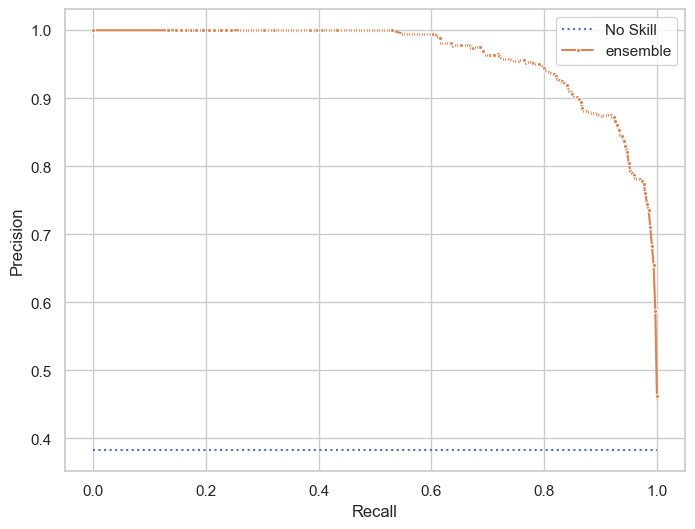

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get no-skill line
no_skill = len(y_train[y_train == 1]) / len(y_train)

# Set the style
sns.set(style="whitegrid")

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
sns.lineplot(x=[0, 1], y=[no_skill, no_skill], linestyle="dotted", label="No Skill")
sns.lineplot(x=lr_recall, y=lr_precision, marker=".", label=model_name)

# Set axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()

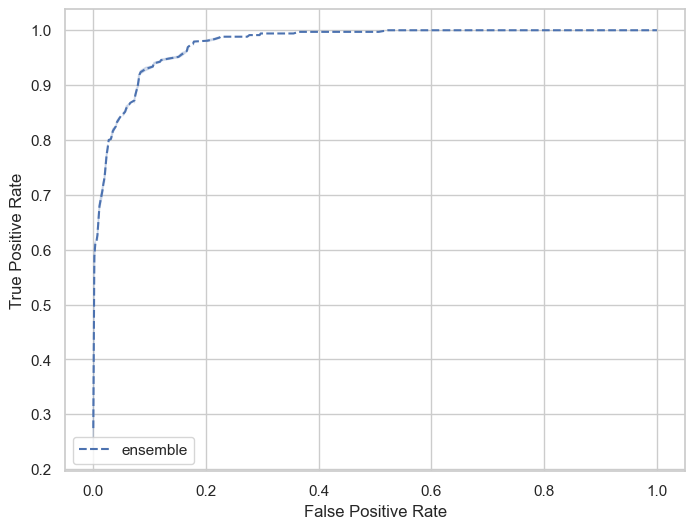

In [32]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=ns_fpr, y=ns_tpr, linestyle="--", label=model_name)

# Set axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [33]:
pd.concat([real_test[["PassengerId"]], pred], axis=1).to_csv(
    f"../outs/{best_model.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.csv",
    index=False,
)